In [1]:
# Let us seed to ensure reproducibility for random operations in Python, NumPy, and TensorFlow
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [35]:
#Let us import the dependencies which are needed
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import cv2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd

In [3]:
# Dataset Path
base_dir = '/Users/bhaveshreddy/Desktop/Capstone Project/plantvillage dataset'

In [4]:
# Checking if the dataset folders exist
print("Dataset Folders:", os.listdir(base_dir))

Dataset Folders: ['grayscale', '.DS_Store', 'segmented', 'color']


In [5]:
# List folder contents excluding .DS_Store
folders = [folder for folder in os.listdir(base_dir) if folder != '.DS_Store']
print("Dataset Folders:", folders)

Dataset Folders: ['grayscale', 'segmented', 'color']


In [6]:
def get_filtered_classes(folder_path):
    # Filter out hidden files and count only valid folders
    return [d for d in os.listdir(folder_path) if not d.startswith('.')]

# Display contents of specific subfolders
segmented_classes = get_filtered_classes(os.path.join(base_dir, "segmented"))
print("Number of Classes in Segmented Dataset:", len(segmented_classes))
print("Sample Folders in Segmented Dataset:", segmented_classes[:5])

color_classes = get_filtered_classes(os.path.join(base_dir, "color"))
print("Number of Classes in Color Dataset:", len(color_classes))
print("Sample Folders in Color Dataset:", color_classes[:5])

grayscale_classes = get_filtered_classes(os.path.join(base_dir, "grayscale"))
print("Number of Classes in Grayscale Dataset:", len(grayscale_classes))
print("Sample Folders in Grayscale Dataset:", grayscale_classes[:5])


Number of Classes in Segmented Dataset: 38
Sample Folders in Segmented Dataset: ['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']
Number of Classes in Color Dataset: 38
Sample Folders in Color Dataset: ['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']
Number of Classes in Grayscale Dataset: 38
Sample Folders in Grayscale Dataset: ['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy']


In [7]:
# Display the number of images in a specific class folder
class_path = os.path.join(base_dir, "color/Grape___healthy")
print("Number of Images in Grape___healthy Class:", len(os.listdir(class_path)))
print("Sample Image Files:", os.listdir(class_path)[:5])

Number of Images in Grape___healthy Class: 423
Sample Image Files: ['04991ee7-b17c-420f-90ff-230d4e59361a___Mt.N.V_HL 9055.JPG', 'e949f6bb-cda7-4824-9a97-67337fc164a5___Mt.N.V_HL 6156.JPG', 'bd88082c-b059-4087-88f4-b6ba9cbf07aa___Mt.N.V_HL 6124.JPG', '59ecd16e-8136-4295-93e4-0dc8755f48eb___Mt.N.V_HL 6133.JPG', '215c8317-c0ca-4b35-9ac2-28e01712e367___Mt.N.V_HL 8914.JPG']


In [8]:
# Display the number of images in a specific class folder
class_path = os.path.join(base_dir, "color/Apple___Apple_scab")
print("Number of Images in Grape___healthy Class:", len(os.listdir(class_path)))
print("Sample Image Files:", os.listdir(class_path)[:5])

Number of Images in Grape___healthy Class: 630
Sample Image Files: ['14c623e5-051c-42f6-9e4f-f7a93e6a723c___FREC_Scab 2965.JPG', 'bceb695a-e877-4b2b-bf05-241661d511d4___FREC_Scab 3240.JPG', '1f6abf22-93fa-48f0-a509-cc3e210f75f0___FREC_Scab 3172.JPG', '623fb084-dbac-42fb-b636-7cfcb89ba9f6___FREC_Scab 3437.JPG', 'be517ff5-5e63-4f6a-9f55-1522c9ec972b___FREC_Scab 3123.JPG']


In [9]:
# Display the number of images in a specific class folder
class_path = os.path.join(base_dir, "color/Blueberry___healthy")
print("Number of Images in Grape___healthy Class:", len(os.listdir(class_path)))
print("Sample Image Files:", os.listdir(class_path)[:5])

Number of Images in Grape___healthy Class: 1502
Sample Image Files: ['c157148e-3d6c-48ea-835e-20f6ed63d22d___RS_HL 0593.JPG', '42b68a7a-ffb1-4d0a-ac06-e357b63ce3ca___RS_HL 2398.JPG', '36f76812-9b6f-4636-94f6-4a89751d1cec___RS_HL 5466.JPG', 'c38eff8c-21ff-4a08-9989-7dbcc5797694___RS_HL 5430.JPG', '60a8bed2-8e15-464d-b522-393635411c3d___RS_HL 4992.JPG']


In [10]:
# Display the number of images in a specific class folder
class_path = os.path.join(base_dir, "color/Cherry_(including_sour)___healthy")
print("Number of Images in Grape___healthy Class:", len(os.listdir(class_path)))
print("Sample Image Files:", os.listdir(class_path)[:5])

Number of Images in Grape___healthy Class: 854
Sample Image Files: ['517b275d-ef1e-49b1-be9e-c7dcc95dab00___JR_HL 3988.JPG', 'df2935bd-3e9b-4da1-8bba-5a449503f773___JR_HL 9508.JPG', '9b15b47c-53e0-4873-b51c-d2b6e316d56c___JR_HL 4180.JPG', 'f9236ca5-ea7c-4a87-bac0-396883f95ba6___JR_HL 9838.JPG', 'c655f45b-4c63-406c-8f6e-e3c4f9e85b06___JR_HL 9870.JPG']


In [11]:
# Display the number of images in a specific class folder
class_path = os.path.join(base_dir, "color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
print("Number of Images in Grape___healthy Class:", len(os.listdir(class_path)))
print("Sample Image Files:", os.listdir(class_path)[:5])

Number of Images in Grape___healthy Class: 513
Sample Image Files: ['eda51a46-b237-47c4-b19f-97463e2c303a___RS_GLSp 4618.JPG', 'fd1e7be2-d635-4d70-85ac-f5d68ce7c2d1___RS_GLSp 4450 copy.jpg', '97173da1-f3d9-4b42-8e86-3f2a066c1704___RS_GLSp 4449.JPG', '782d68b3-4619-4a4b-865f-7071d2552500___RS_GLSp 4593.JPG', 'c740d42c-29fd-49cd-a941-afd8429b1f28___RS_GLSp 4688.JPG']


In [12]:
# Load and display an image from the dataset
image_path = os.path.join(base_dir, "/Users/bhaveshreddy/Desktop/Capstone Project/plantvillage dataset/color/Apple___healthy/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL 5759.JPG")

In [13]:
# Read the image
img = mpimg.imread(image_path)
print("Original Image Shape:", img.shape)

Original Image Shape: (256, 256, 3)


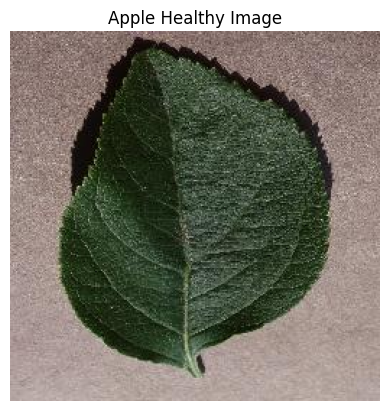

In [14]:
# Display the original image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.title("Apple Healthy Image")
plt.show() # This one is Apple Healthy

Original Image Shape: (256, 256, 3)


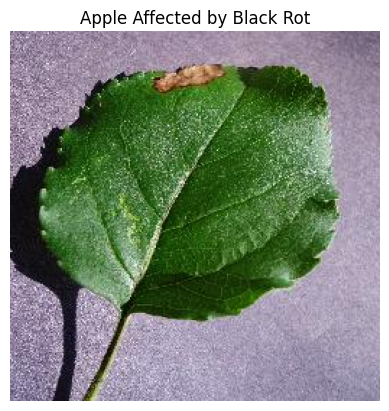

In [15]:
image_path = os.path.join(base_dir, "/Users/bhaveshreddy/Desktop/Capstone Project/plantvillage dataset/color/Apple___Black_rot/0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE.S 2908.JPG")
img = mpimg.imread(image_path)
print("Original Image Shape:", img.shape)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.title("Apple Affected by Black Rot")
plt.show() # Black Rot

Original Image Shape: (256, 256, 3)


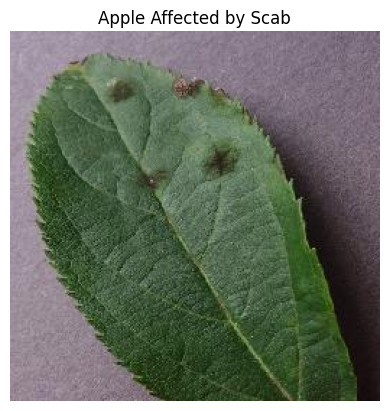

In [16]:
image_path = os.path.join(base_dir, "/Users/bhaveshreddy/Desktop/Capstone Project/plantvillage dataset/color/Apple___Apple_scab/ef40de8f-19ee-4a7f-b9de-f37ebcbac26c___FREC_Scab 3364.JPG")
img = mpimg.imread(image_path)
print("Original Image Shape:", img.shape)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.title("Apple Affected by Scab")
plt.show() # Scab

Original Image Shape: (256, 256, 3)


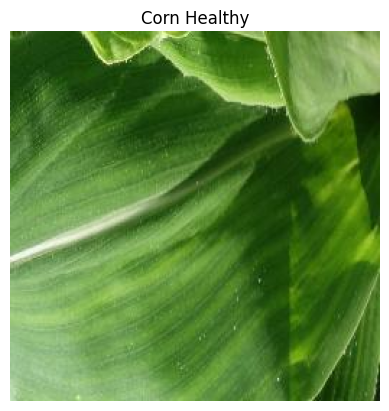

In [17]:
image_path = os.path.join(base_dir, "/Users/bhaveshreddy/Desktop/Capstone Project/plantvillage dataset/color/Corn_(maize)___healthy/0ad1f85a-765f-43e5-8b7b-4a7521be768d___R.S_HL 5520 copy 2.jpg")
img = mpimg.imread(image_path)
print("Original Image Shape:", img.shape)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.title("Corn Healthy")
plt.show() # Corn Healthy

Original Image Shape: (256, 256, 3)


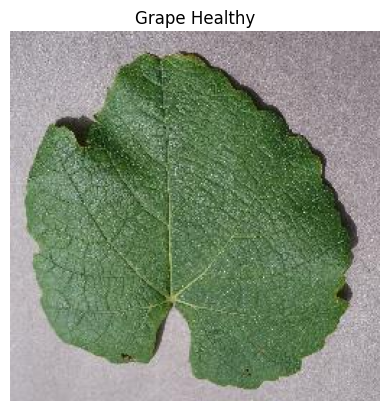

In [18]:
image_path = os.path.join(base_dir, "/Users/bhaveshreddy/Desktop/Capstone Project/plantvillage dataset/color/Grape___healthy/0f0596ab-ea6e-472b-a7d5-0a80b1d1ebb2___Mt.N.V_HL 9011.JPG")
img = mpimg.imread(image_path)
print("Original Image Shape:", img.shape)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.title("Grape Healthy")
plt.show() # Grape Healthy

In [19]:
# Image Parameters
img_size = 224  # Target image size
batch_size = 32  # Batch size for model training

# Resize the image to a fixed size for consistency
img_resized = cv2.resize(img, (img_size, img_size))
print("Resized Image Shape:", img_resized.shape)


Resized Image Shape: (224, 224, 3)


In [20]:
# Normalize the image to [0, 1] range
img_normalized = img_resized / 255.0
print("Normalized Pixel Values (Sample):", img_normalized[0][0])
# In most image formats (like PNG or JPG), pixel values range from 0 to 255 for each color channel (Red, Green, Blue).Neural networks perform better when input values are in a smaller and consistent range, typically [0, 1].

Normalized Pixel Values (Sample): [0.65882353 0.64313725 0.6627451 ]


In [21]:
# Convert to grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
print("Grayscale Image Shape:", img_gray.shape)

Grayscale Image Shape: (224, 224)


In [22]:
img_blur = cv2.GaussianBlur(img_resized, (5, 5), 0)
#Gaussian Blur is used to smooth the image by reducing noise and detail.

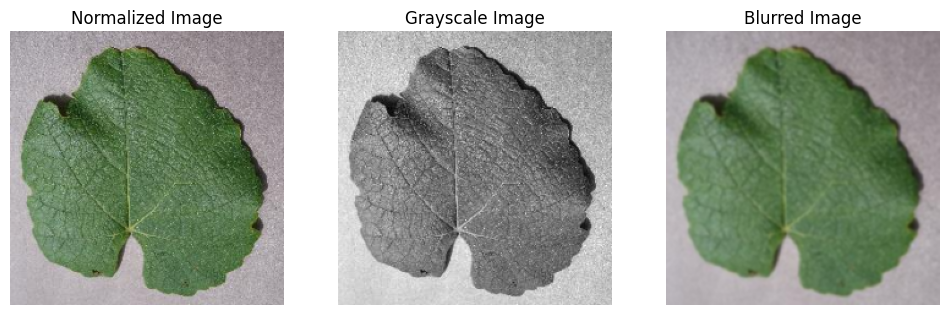

In [23]:
# Display the preprocessed images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_normalized)
plt.axis('off')
plt.title("Normalized Image")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")

plt.subplot(1, 3, 3)
plt.imshow(img_blur)
plt.axis('off')
plt.title("Blurred Image")

plt.show()


In [24]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [25]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    os.path.join(base_dir, "color"),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [26]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    os.path.join(base_dir, "color"),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 10849 images belonging to 38 classes.


In [27]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [30]:
# Early stopping callback to prevent unnecessary epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

In [31]:
# Model Training
history = model.fit(
    train_generator,
    epochs=3,  # Keeping epochs at 3 
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2239s 2s/step - accuracy: 0.5856 - loss: 1.8706 - val_accuracy: 0.8640 - val_loss: 0.4251
Epoch 2/3
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2040s 2s/step - accuracy: 0.9117 - loss: 0.2785 - val_accuracy: 0.8873 - val_loss: 0.3633
Epoch 3/3
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2191s 2s/step - accuracy: 0.9647 - loss: 0.1061 - val_accuracy: 0.8829 - val_loss: 0.4175


In [32]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
340/340 ━━━━━━━━━━━━━━━━━━━━ 132s 388ms/step - accuracy: 0.8856 - loss: 0.3639
Validation Accuracy: 88.73%


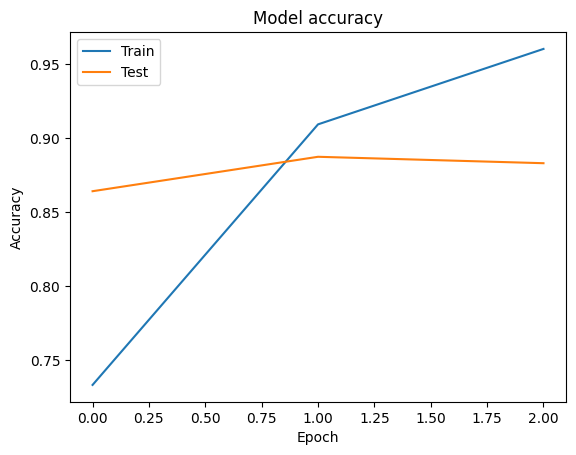

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


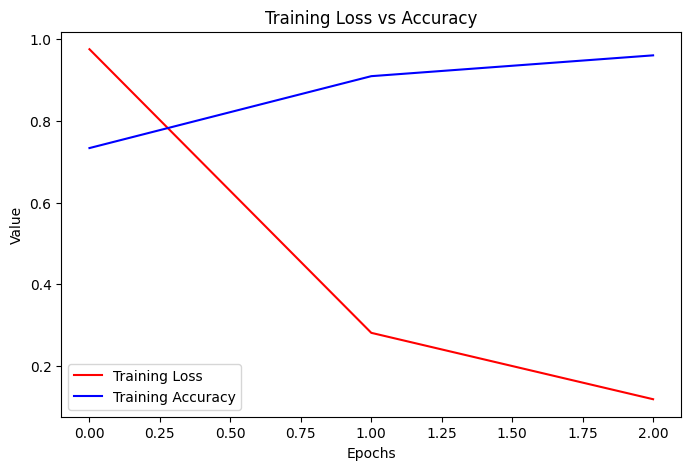

In [38]:
# Training Loss vs Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title('Training Loss vs Accuracy')
plt.show()


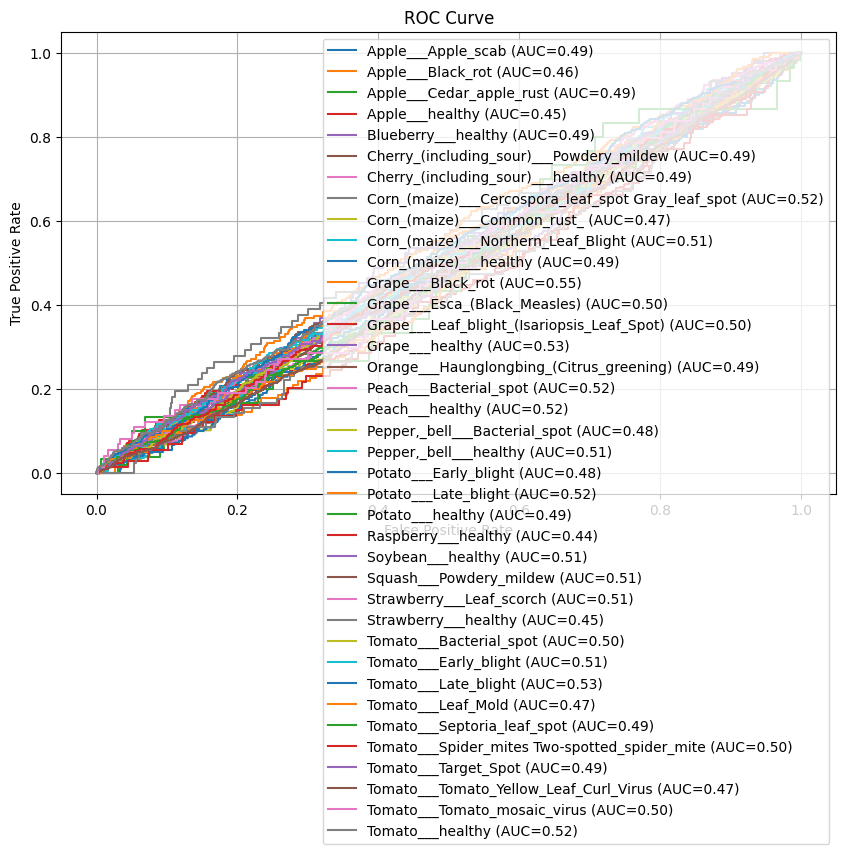

In [42]:
from sklearn.metrics import roc_curve, auc
import tensorflow as tf

# Convert true labels to one-hot encoding
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=len(validation_generator.class_indices))

# Compute ROC curve and AUC for each class
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(validation_generator.class_indices.keys()):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], val_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC={roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [44]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

In [45]:
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


In [46]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}
json.dump(class_indices, open('class_indices.json', 'w'))


In [51]:
# Example Usage
image_path = '/Users/bhaveshreddy/Desktop/cardio-risk-prediction/checking.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Predicted Class Name: Apple___Black_rot


In [52]:
model.save('/Users/bhaveshreddy/Desktop/Capstone Project/plant_model.h5')
